# Assignment 1: Data Preprocessing and EDA for E‑Commerce Orders

This notebook is your working template for **Assignment 1**.

You will:
- Load **four tables** (`orders`, `order_items`, `order_shipping`, `payments`).
- Join them into a single order-level dataset.
- Clean and transform the data.
- Perform basic EDA and visualization.

Work **top-to-bottom**. Complete each sub-part in the order they appear before proceeding.

## Submitted by

Group number on Canvas:  
Student ID (AxxxxxxxZ) | NUSNet ID (exxxxxxx) | Name (as it appears on Canvas)
-----------------------|----------------------|-------------------------------
A0331496Y | e1582352 | HUANG KUAN HSIN
A0329475R | e1553802 | YU CHING-TANG
Member 3 ID | Member 3 NUSNet | Member 3 Name
Member 4 ID | Member 4 NUSNet | Member 4 Name

## Setup

Run the cell below to import the required Python packages.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

plt.style.use('seaborn-v0_8')

---
## Part 1: Data Preprocessing (10 marks)

### 1.1 Data Loading & Joining (4 marks)

We first load each table, inspect it, and then join them into a single DataFrame.


**Report — Setup and Part 1.1 (Data Loading):**  
We import standard libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and later analysis. Loading the four CSVs (orders, order_items, order_shipping, payments) gives us the raw building blocks; joining them later produces a single order-level view for cleaning and modeling. *Business objective:* One row per order with order attributes, items, shipping, and payment is required for downstream tasks (e.g., predicting payment type or clustering order behavior).

#### Load the CSV files

**Task:**
- Dowload the four CSV files from canvas and upload them under the 'files' tab for this colab instance
- Load the four CSV files using `pd.read_csv()` into:
  - `df_orders`
  - `df_order_items`
  - `df_shipping`
  - `df_payments`

Update the filenames/paths if necessary.

In [ ]:
# ANSWER: load the CSV files
df_orders = pd.read_csv('orders.csv')
df_order_items = pd.read_csv('order_items.csv')
df_shipping = pd.read_csv('order_shipping.csv')
df_payments = pd.read_csv('payments.csv')


#### Inspect each table

**Task:**
- For **each** DataFrame, display:
  - `head()` (first 5 rows)
  - `shape` (rows, columns)

This helps you understand the raw structure before joining.

In [ ]:
# ANSWER: inspect the DataFrames
df_orders.head()

,order_id,order_status,order_purchase_hour,order_purchase_dayofweek,order_purchase_month,order_total_value
0,sdv-id-whzjUX,shipped,10,4,4,744.312535
1,sdv-id-gqShVM,delivered,19,2,4,1030.521912
2,sdv-id-vtaqcY,delivered,18,4,8,28.472994
3,sdv-id-xkqwdo,invoiced,23,1,8,143.914263
4,sdv-id-sGyHvQ,delivered,19,0,2,16.944537


In [ ]:
df_orders.shape

(100000, 6)

In [ ]:
df_order_items.head()

,order_id,num_items,num_unique_products,num_unique_sellers,total_item_price,avg_item_price,total_freight_value,top_product_category
0,sdv-id-whzjUX,1,1,1,352.420029,369.966521,68.790159,construction_tools_construction
1,sdv-id-gqShVM,1,1,1,1580.187928,1089.284136,84.603289,auto
2,sdv-id-vtaqcY,1,1,1,45.969263,36.969754,24.022637,furniture_decor
3,sdv-id-xkqwdo,1,1,1,146.023435,126.755360,16.945349,consoles_games
4,sdv-id-sGyHvQ,1,1,1,30.525812,22.797409,17.785846,air_conditioning


In [ ]:
df_order_items.shape

(100000, 8)

In [ ]:
df_shipping.head()

,order_id,customer_state
0,sdv-id-whzjUX,Massachusetts
1,sdv-id-gqShVM,Ohio
2,sdv-id-vtaqcY,Wisconsin
3,sdv-id-xkqwdo,Michigan
4,sdv-id-sGyHvQ,Nevada


**Report — Joining tables:**  
We use **inner joins** on `order_id` so that only orders present in all four tables are kept. This avoids missing shipping or payment information and ensures a consistent, analyzable unit (one row = one order with full context). The order of joins (orders → order_items → shipping → payments) is logical since items and shipping/payment are linked by the same key. *Business impact:* A single `df_orders_full` supports reliable analytics and ML (e.g., payment prediction, clustering) without incomplete records.

In [ ]:
df_shipping.shape

(100000, 2)

In [ ]:
df_payments.head()

,order_id,payment_type
0,sdv-id-whzjUX,voucher
1,sdv-id-gqShVM,voucher
2,sdv-id-vtaqcY,voucher
3,sdv-id-xkqwdo,credit_card
4,sdv-id-sGyHvQ,credit_card


In [ ]:
df_payments.shape

(100000, 2)

#### Join the tables on `order_id` to create a single order-level DataFrame

**Task:**
- Perform **inner joins** on `order_id` so that only orders present in **all** tables remain.
- Join order tables in this order:
  1. `df_orders` with `df_order_items`
  2. result with `df_shipping`
  3. result with `df_payments`
- Store the final DataFrame as `df_orders_full`.
- Display `head()` and `shape` for `df_orders_full`.


In [ ]:
# ANSWER: join the tables
df_orders_full = pd.merge(
    df_orders,
    df_order_items,
    on='order_id',
    how='inner'
)

df_orders_full = pd.merge(
    df_orders_full,
    df_shipping,
    on='order_id',
    how='inner'
)

df_orders_full = pd.merge(
    df_orders_full,
    df_payments,
    on='order_id',
    how='inner'
)

df_orders_full.head()

,order_id,order_status,order_purchase_hour,order_purchase_dayofweek,order_purchase_month,order_total_value,num_items,num_unique_products,num_unique_sellers,total_item_price,avg_item_price,total_freight_value,top_product_category,customer_state,payment_type
0,sdv-id-whzjUX,shipped,10,4,4,744.312535,1,1,1,352.420029,369.966521,68.790159,construction_tools_construction,Massachusetts,voucher
1,sdv-id-gqShVM,delivered,19,2,4,1030.521912,1,1,1,1580.187928,1089.284136,84.603289,auto,Ohio,voucher
2,sdv-id-vtaqcY,delivered,18,4,8,28.472994,1,1,1,45.969263,36.969754,24.022637,furniture_decor,Wisconsin,voucher
3,sdv-id-xkqwdo,invoiced,23,1,8,143.914263,1,1,1,146.023435,126.755360,16.945349,consoles_games,Michigan,credit_card
4,sdv-id-sGyHvQ,delivered,19,0,2,16.944537,1,1,1,30.525812,22.797409,17.785846,air_conditioning,Nevada,credit_card


In [ ]:
df_orders_full.shape

(100000, 15)

---
### 1.2 Data Cleaning (3 marks)

We now clean `df_orders_full` so it is ready for analysis.

#### Handle missing values

**Task:**
- For **numerical** columns: replace missing values with the **median** of that column.
- For **categorical** columns: replace missing values with the **mode** (most frequent value).
- Drop any rows where `order_id` or `payment_type` is missing (if any remain)

Work directly on `df_orders_full`.

In [ ]:
# ANSWER: Handle missing values
df_orders_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  100000 non-null  object 
 1   order_status              100000 non-null  object 
 2   order_purchase_hour       100000 non-null  int64  
 3   order_purchase_dayofweek  100000 non-null  int64  
 4   order_purchase_month      100000 non-null  int64  
 5   order_total_value         100000 non-null  float64
 6   num_items                 100000 non-null  int64  
 7   num_unique_products       100000 non-null  int64  
 8   num_unique_sellers        100000 non-null  int64  
 9   total_item_price          100000 non-null  float64
 10  avg_item_price            99228 non-null   float64
 11  total_freight_value       100000 non-null  float64
 12  top_product_category      88444 non-null   object 
 13  customer_state            100000 non-null  ob

**Report — Missing values:**  
Numerical missing values are filled with the **median** (robust to outliers); categorical with the **mode** (most frequent category). We then drop any rows with missing `order_id` or `payment_type` because these are essential identifiers and the target for later prediction. *Reasoning:* Median and mode preserve distribution and avoid introducing arbitrary constants; dropping critical missing keys keeps the dataset valid for modeling.

In [ ]:
# Identify numerical and categorical columns
num_cols = df_orders_full.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_orders_full.select_dtypes(include=['object']).columns

In [ ]:
for col in num_cols:
    df_orders_full[col] = df_orders_full[col].fillna(
        df_orders_full[col].median()
    )

for col in cat_cols:
    df_orders_full[col] = df_orders_full[col].fillna(
        df_orders_full[col].mode()[0]
    )

In [ ]:
df_orders_full.dropna(subset=['order_id', 'payment_type'], inplace=True)

In [ ]:
df_orders_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  100000 non-null  object 
 1   order_status              100000 non-null  object 
 2   order_purchase_hour       100000 non-null  int64  
 3   order_purchase_dayofweek  100000 non-null  int64  
 4   order_purchase_month      100000 non-null  int64  
 5   order_total_value         100000 non-null  float64
 6   num_items                 100000 non-null  int64  
 7   num_unique_products       100000 non-null  int64  
 8   num_unique_sellers        100000 non-null  int64  
 9   total_item_price          100000 non-null  float64
 10  avg_item_price            100000 non-null  float64
 11  total_freight_value       100000 non-null  float64
 12  top_product_category      100000 non-null  object 
 13  customer_state            100000 non-null  ob

#### Remove clearly invalid numeric records

**Task:**
- Remove rows where:
  - `num_items` ≤ 0, or
  - `order_total_value` ≤ 0, or
  - `total_item_price` < 0, or
  - `total_freight_value` < 0.


**Report — Invalid numeric records:**  
Rows with `num_items` ≤ 0, `order_total_value` ≤ 0, or negative item/freight values are removed because they represent impossible or erroneous transactions. Keeping them would distort summaries and models. *Business objective:* Clean, logically consistent data for reporting and ML.

In [ ]:
# ANSWER: filter invalid numeric records
df_orders_full = df_orders_full[
    (df_orders_full['num_items'] > 0) &
    (df_orders_full['order_total_value'] > 0) &
    (df_orders_full['total_item_price'] >= 0) &
    (df_orders_full['total_freight_value'] >= 0)
]


#### Check cleanliness and key uniqueness

**Task:**
- Confirm there are **no null values** in `df_orders_full`.
- Check that `order_id` is unique (one row per order).


In [ ]:
# ANSWER: final cleaning checks
print("Total null values after cleaning:")
print(df_orders_full.isnull().sum().sum())

print("Are all order_id values unique?")
print(df_orders_full['order_id'].is_unique)

Total null values after cleaning:
0
Are all order_id values unique?
True


---
### 1.3 Data Transformation (3 marks)

Next, we perform sanity checks and create new features that will be useful later.

#### Sanity checks on counts and values

**Task:**
- Keep only rows where both:
  - `num_items` ≥ `num_unique_products`,
  - `order_total_value` ≥ `total_item_price + total_freight_value`


**Report — Sanity checks and new features:**  
We keep only rows where `num_items` ≥ `num_unique_products` and `order_total_value` ≥ `total_item_price + total_freight_value` so that counts and totals are internally consistent. We then create **order_value_per_item** (average value per item) and **order_size_category** (Small/Medium/Large) to support segmentation and prediction (e.g., payment type or basket analysis). *Business use:* Size categories and value-per-item help target marketing and understand order mix.

In [ ]:
# ANSWER: apply sanity checks
df_orders_full = df_orders_full[
    (df_orders_full['num_items'] >= df_orders_full['num_unique_products']) &
    (df_orders_full['order_total_value'] >= (df_orders_full['total_item_price'] + df_orders_full['total_freight_value']))
]

print(f"Rows remaining after sanity checks: {len(df_orders_full)}")

Rows remaining after sanity checks: 46287


#### Create `order_value_per_item`

**Task:**
- Create a new column `order_value_per_item` defined as `total_item_price / num_items`.


In [ ]:
# ANSWER: create order_value_per_item
df_orders_full['order_value_per_item'] = df_orders_full['total_item_price'] / df_orders_full['num_items']

In [ ]:
df_orders_full[['order_id', 'total_item_price', 'num_items', 'order_value_per_item']].head()

,order_id,total_item_price,num_items,order_value_per_item
0,sdv-id-whzjUX,352.420029,1,352.420029
5,sdv-id-dbopoJ,289.242639,1,289.242639
8,sdv-id-FSEOvM,26.893468,1,26.893468
12,sdv-id-bQcBUR,37.790896,1,37.790896
14,sdv-id-MPxIXB,169.528323,3,56.509441


#### Create `order_size_category`

**Task:**
- Create a new categorical column `order_size_category` with values:
  - "Small" if `num_items` ≤ 2
  - "Medium" if `num_items` ≤ 5
  - "Large" if `num_items` > 5


In [ ]:
# ANSWER: create order_size_category
def categorize_order_size(num_items):
    if num_items <= 2:
        return "Small"
    elif num_items <= 5:
        return "Medium"
    else:
        return "Large"

df_orders_full['order_size_category'] = df_orders_full['num_items'].apply(categorize_order_size)

In [ ]:
df_orders_full[['order_size_category']].head()

,order_size_category
0,Small
5,Small
8,Small
12,Small
14,Medium


#### Final transformation check

**Task:**
- Confirm there are no null values in `df_orders_full`.
- Display:
  - `head()`
  - `shape`
  - `info()`


In [ ]:
# ANSWER: final transformation summary
df_orders_full.head()

,order_id,order_status,order_purchase_hour,order_purchase_dayofweek,order_purchase_month,order_total_value,num_items,num_unique_products,num_unique_sellers,total_item_price,avg_item_price,total_freight_value,top_product_category,customer_state,payment_type,order_value_per_item,order_size_category
0,sdv-id-whzjUX,shipped,10,4,4,744.312535,1,1,1,352.420029,369.966521,68.790159,construction_tools_construction,Massachusetts,voucher,352.420029,Small
5,sdv-id-dbopoJ,delivered,19,2,3,1556.667902,1,1,1,289.242639,1354.621410,15.394619,health_beauty,Vermont,credit_card,289.242639,Small
8,sdv-id-FSEOvM,delivered,15,4,8,62.060506,1,1,1,26.893468,48.485654,18.751282,luggage_accessories,South Carolina,debit_card,26.893468,Small
12,sdv-id-bQcBUR,delivered,21,0,8,73.873470,1,1,1,37.790896,75.704909,8.670875,computers_accessories,Kentucky,credit_card,37.790896,Small
14,sdv-id-MPxIXB,delivered,13,5,5,361.961537,3,3,3,169.528323,50.132979,34.731146,pet_shop,Missouri,voucher,56.509441,Medium


In [ ]:
df_orders_full.shape

(46287, 17)

In [ ]:
df_orders_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46287 entries, 0 to 99997
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  46287 non-null  object 
 1   order_status              46287 non-null  object 
 2   order_purchase_hour       46287 non-null  int64  
 3   order_purchase_dayofweek  46287 non-null  int64  
 4   order_purchase_month      46287 non-null  int64  
 5   order_total_value         46287 non-null  float64
 6   num_items                 46287 non-null  int64  
 7   num_unique_products       46287 non-null  int64  
 8   num_unique_sellers        46287 non-null  int64  
 9   total_item_price          46287 non-null  float64
 10  avg_item_price            46287 non-null  float64
 11  total_freight_value       46287 non-null  float64
 12  top_product_category      46287 non-null  object 
 13  customer_state            46287 non-null  object 
 14  payment_typ

### 1.4 Data Storage

We now save the cleaned, joined, and transformed dataset.

#### 1.4A Save cleaned dataset

**Task:**
- Save `df_orders_full` as `ecommerce_orders_cleaned.csv` (without the index).

In [ ]:
# ANSWER: save to CSV
df_orders_full.to_csv('ecommerce_orders_cleaned.csv', index=False)


**Report — Data storage:**  
Saving the cleaned dataset as `ecommerce_orders_cleaned.csv` (without index) creates a reusable artifact for Assignment 2 (supervised learning) and Assignment 3 (clustering and association mining). This ensures a single source of truth and reproducible pipelines. *Business objective:* Enable downstream modeling and reporting from one consistent, cleaned order-level table.

---
## Part 2: EDA & Data Visualization (4 marks)

We now reload the cleaned dataset and explore it.

**Report — Part 2 (EDA & visualization):**  
We reload the cleaned CSV and produce visualizations to understand distributions (e.g., order value, payment type, product categories), temporal patterns, and relationships. EDA informs feature choice for modeling and supports business questions (e.g., peak hours, popular categories, payment mix). Clear labels and plots make the report interpretable for stakeholders.

### 2.0 Load Transformed Dataset

#### 2.0 Reload CSV

**Task:**
- Load `ecommerce_orders_cleaned.csv` into `df_orders_cleaned`.
- Display `head()` and `shape`.

In [ ]:
# ANSWER: load cleaned dataset
df_orders_cleaned = pd.read_csv('ecommerce_orders_cleaned.csv')
df_orders_cleaned.head()


,order_id,order_status,order_purchase_hour,order_purchase_dayofweek,order_purchase_month,order_total_value,num_items,num_unique_products,num_unique_sellers,total_item_price,avg_item_price,total_freight_value,top_product_category,customer_state,payment_type,order_value_per_item,order_size_category
0,sdv-id-whzjUX,shipped,10,4,4,744.312535,1,1,1,352.420029,369.966521,68.790159,construction_tools_construction,Massachusetts,voucher,352.420029,Small
1,sdv-id-dbopoJ,delivered,19,2,3,1556.667902,1,1,1,289.242639,1354.621410,15.394619,health_beauty,Vermont,credit_card,289.242639,Small
2,sdv-id-FSEOvM,delivered,15,4,8,62.060506,1,1,1,26.893468,48.485654,18.751282,luggage_accessories,South Carolina,debit_card,26.893468,Small
3,sdv-id-bQcBUR,delivered,21,0,8,73.873470,1,1,1,37.790896,75.704909,8.670875,computers_accessories,Kentucky,credit_card,37.790896,Small
4,sdv-id-MPxIXB,delivered,13,5,5,361.961537,3,3,3,169.528323,50.132979,34.731146,pet_shop,Missouri,voucher,56.509441,Medium


In [ ]:
df_orders_cleaned.shape

(46287, 17)

### 2.1 Unique Categories and Payment Types (1 mark)

**Task:**
- Compute the number of unique values in `top_product_category` and `payment_type`.
- Display:
  - The top 5 product categories by order count.
  - The top 3 payment types by order count.

In [ ]:
# ANSWER: unique counts and top values
unique_categories = df_orders_cleaned['top_product_category'].nunique()
unique_payments = df_orders_cleaned['payment_type'].nunique()

print(f"Number of unique product categories: {unique_categories}")
print(f"Number of unique payment types: {unique_payments}")
print("-" * 50)

#Top 5 Product Categories
print("Top 5 Product Categories by Order Count:")
print(df_orders_cleaned['top_product_category'].value_counts().head(5))
print("-" * 50)

#Top 3 Payment Types
print("Top 3 Payment Types by Order Count:")
print(df_orders_cleaned['payment_type'].value_counts().head(3))


Number of unique product categories: 71
Number of unique payment types: 5
--------------------------------------------------
Top 5 Product Categories by Order Count:
top_product_category
bed_bath_table           6419
health_beauty            4208
furniture_decor          3413
computers_accessories    3386
telephony                2570
Name: count, dtype: int64
--------------------------------------------------
Top 3 Payment Types by Order Count:
payment_type
credit_card    27987
voucher        13812
points          2532
Name: count, dtype: int64


### 2.2 Bar Chart of Orders by Product Category (2 marks)

#### Create bar chart

**Task:**
- Create a bar chart of number of orders per `top_product_category`, sorted in descending order.
- Add a clear title and axis labels.

/tmp/ipython-input-3855830771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='pastel')


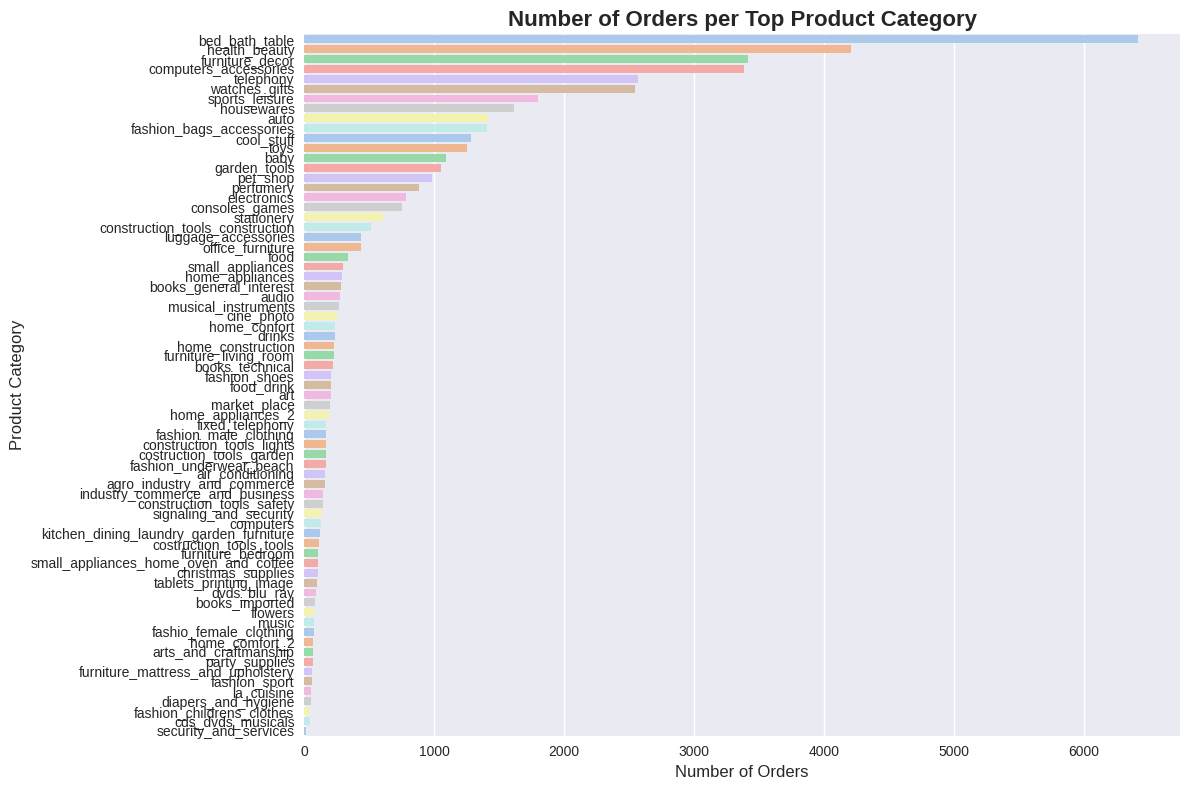

In [ ]:
# ANSWER: bar chart of product categories
category_counts = df_orders_cleaned['top_product_category'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='pastel')

plt.title('Number of Orders per Top Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

plt.tight_layout()
plt.savefig('orders_by_category.png')

#### Brief interpretation

**Task:**
- In 2–3 sentences, describe any trends you see (e.g., which categories dominate, whether the distribution is skewed, etc.).

The dataset shows a clear long tail pattern where a small number of popular categories account for most of the orders. Categories such as bed_bath_table and health_beauty dominate the sales volume, while order counts drop off quickly after the first few categories. Most of the remaining categories contribute relatively few orders and can be considered niche compared to the platform’s main drivers.

### 2.3 Box Plot: Order Value vs Number of Items (2 mark)

#### Create box plot

**Task:**
- Create a box plot with:
  - X‑axis: `num_items`
  - Y‑axis: `order_total_value`
- Add a clear title and axis labels.

/tmp/ipython-input-1340484893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_orders_cleaned, x='num_items', y='order_total_value', palette='Set2')


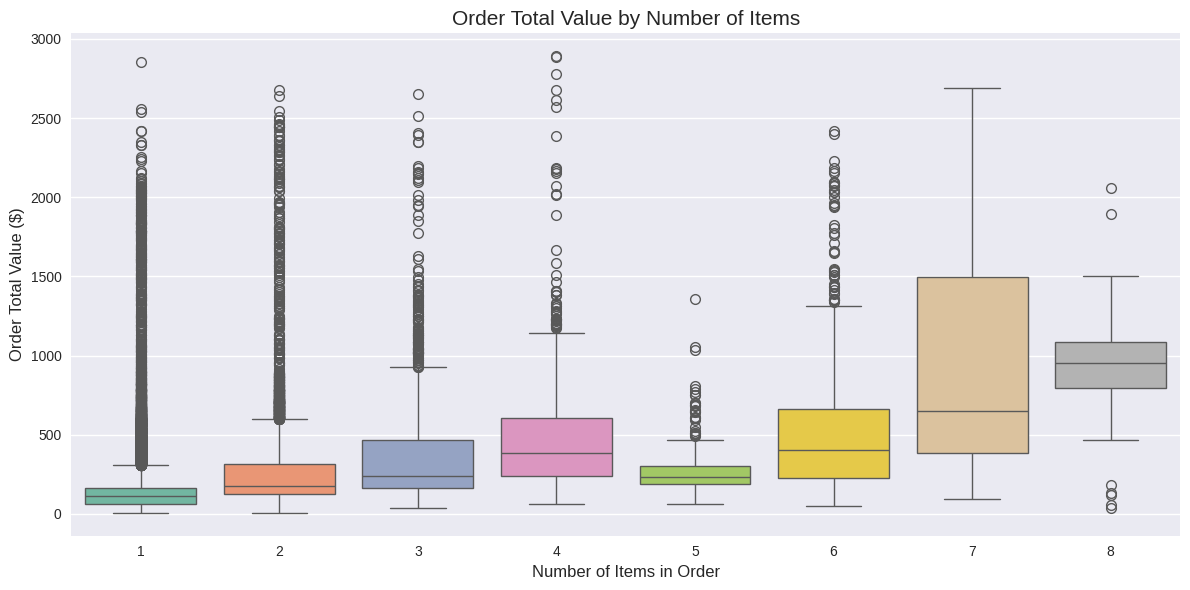

In [ ]:
# ANSWER: box plot order_total_value vs num_items
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_orders_cleaned, x='num_items', y='order_total_value', palette='Set2')

plt.title('Order Total Value by Number of Items', fontsize=15)
plt.xlabel('Number of Items in Order', fontsize=12)
plt.ylabel('Order Total Value ($)', fontsize=12)

plt.tight_layout()
plt.savefig('order_value_vs_items_boxplot.png')

#### Brief interpretation

**Task:**
- In 2–3 sentences, describe how order value changes as the number of items increases (e.g., linear trend, diminishing returns, many outliers, etc.).

As the number of items increases, the median order value generally trends upward, though there is a noticeable dip and tighter variance for orders containing exactly five items. There is considerable variation within each group, with many outliers indicating some orders have exceptionally high values regardless of item count. Overall, larger orders tend to have higher values but order value can vary widely for any given number of items.